## 6. Seaborn
Introduction to the Seaborn package for statistical plot visualisations.

The documentation can be found here <https://seaborn.pydata.org/index.html> - API reference section

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

## (A) Distribution plot

In [4]:
# load in one of Seaborn's datasets
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


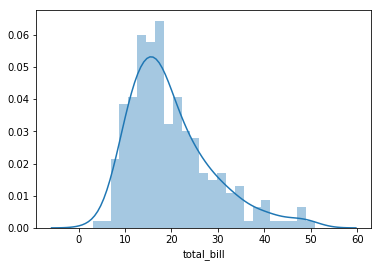

In [5]:
# Distribution plot for univariate data
sns.distplot(tips['total_bill'], bins = 25)
# Line is known as a Gaussian KDE, Kernel destiny estimation

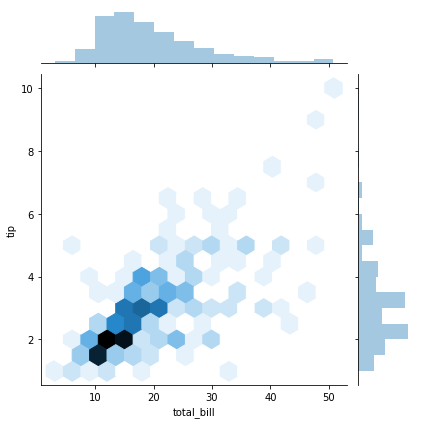

In [6]:
 # Joint plot plots two distribution plots against each other. 
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

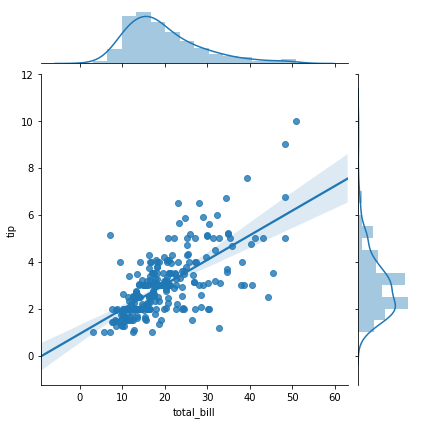

In [7]:
# Can plot as linear regression.
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

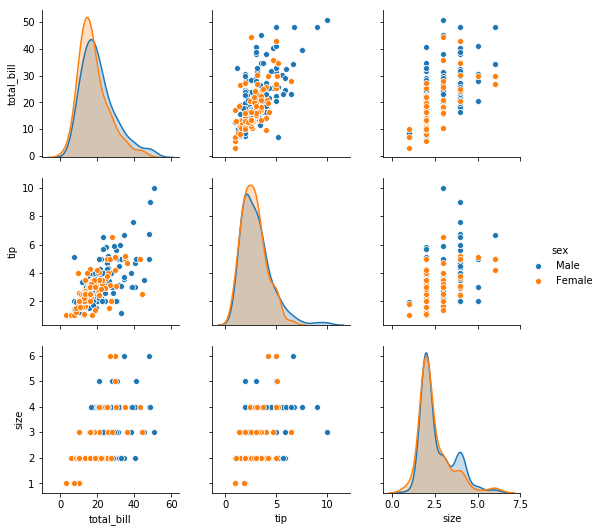

In [8]:
# Pairplot is quickest way to learn about your dataset.
#  hue takes a categorical argument
sns.pairplot(tips,hue='sex')

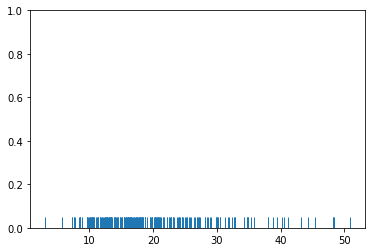

In [9]:
 # Rugplot draws dash for each data point.
sns.rugplot(tips['total_bill'])

In [10]:
# Kde draws a gaussian on each point on the rugplot and sums them all up, to build the Gaussian kernel density estimation.

(0, 1)

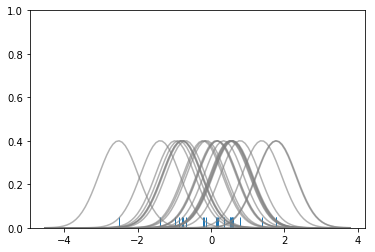

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)
sns.rugplot(dataset)

# set up axis
x_min = dataset.min() -2
x_max = dataset.max() +2

x_axis = np.linspace(x_min,x_max,100)
# Bandwidth estimated by Silverman's rule.
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    #plot normal distribution for each point
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel *0.4
    plt.plot(x_axis, kernel, color='grey', alpha = 0.6)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of basis functions')

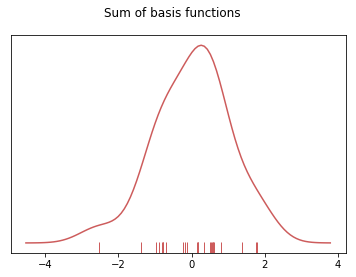

In [12]:
# The kde is the sum of all the above basis functions.
# axis=0 because if you look up np.sum() that's how you add 
# x-coords with x-coords and y with y.
# Need to look up what the stats.norm fucntion outputs.
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
# get rid of yticks
plt.yticks([])
sns.rugplot(dataset,c = 'indianred')
# Suptitle plots a centred title
plt.suptitle("Sum of basis functions")

## (B) Categorical Plots

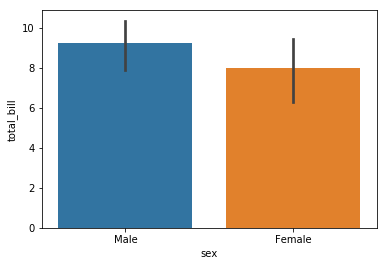

In [13]:
#Barplot plots categorical on x axis, with numerical on y
# make estimator the standard deviation (takes any function)
sns.barplot(x='sex',y='total_bill',data=tips,estimator= np.std)

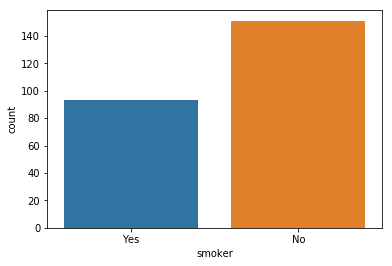

In [14]:
# Countplot, same as barplot but estimator is explicitly counting the number of occurences.
sns.countplot(x='smoker',data=tips)

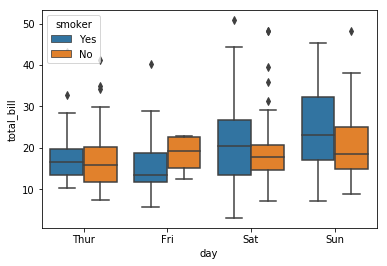

In [16]:
# Boxplot shows distribution and deviations for different categorical variables
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

# Boxplots show the quartiles of the dataset 
# Whiskers show the rest of the distribution
# Points outside whiskers are determined to be outliers. 

# ie. Do Smokers spend less on the weekend? Seems like they spend more to me

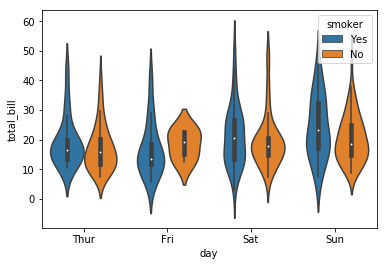

In [19]:
"""
To reiterate here, the day is the categorical variable
"""

# Violin plot shows the KDE as well, but it is harder to read.
# Gives more information about the distribution of the points.
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker')

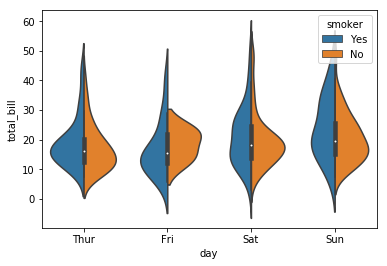

In [21]:
# It's nicer to split them (as they are just reflections of each other)
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

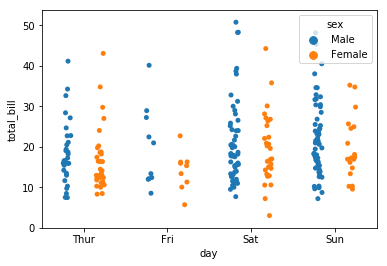

In [29]:
# Jitter adds some noise so we can see which points are densely populated (harder to do when 1-d)
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

"\nDon't work well with large datasets.\n"

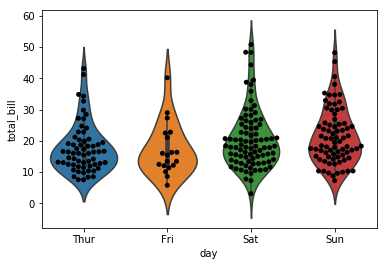

In [31]:
# Swarm plot is a combination of Stripplot and Violin plot
# that is, it shows the distribution and the data points
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

"""
Don't work well with large datasets.
"""

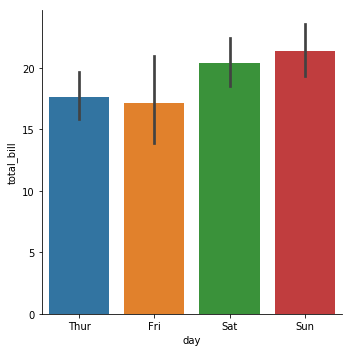

In [35]:
# Most general method is to call a factorplot
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

## (C) Matrix Plots

For this to work we need to have the data in a Matrix form, labels for rows and axes. ie. flight.corr() or a Pivot table.

In [37]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [47]:
tc = tips.corr()

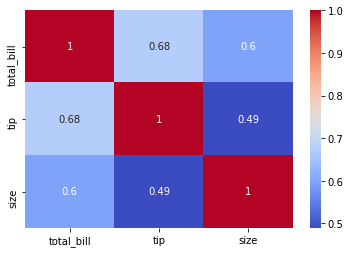

In [50]:
# cmap is a color map
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [52]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

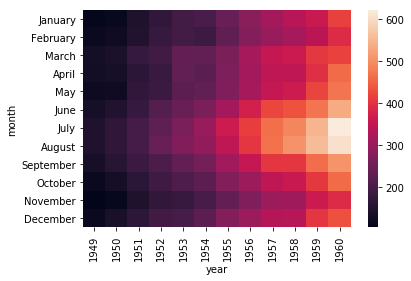

In [53]:
sns.heatmap(fp)

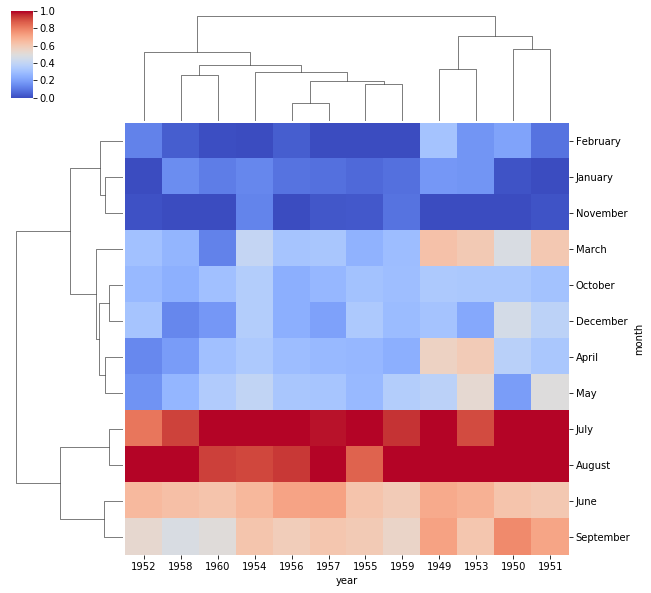

In [60]:
# Clusters the indices and columns that are similar, ie. doesn't preserve the order
# Look at the months and years in this example, they are not in order.
sns.clustermap(fp,cmap ='coolwarm',standard_scale=1)

## (D) Grids

In [61]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


'\nRefer to this grid in three ways: Upper, Diagona, Lower\nJust like matrix algebra.\n'

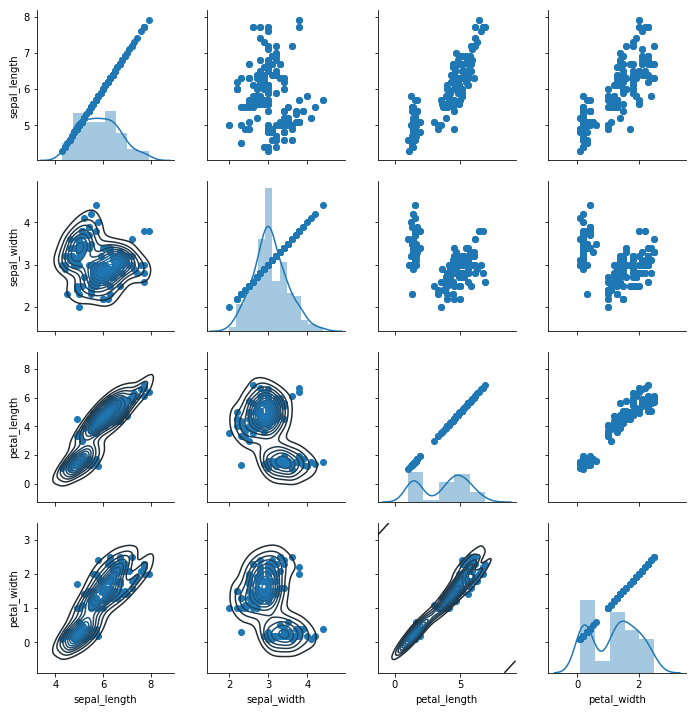

In [69]:
g = sns.PairGrid(iris)
g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

"""
Refer to this grid in three ways: Upper, Diagona, Lower
Just like matrix algebra.
""" 

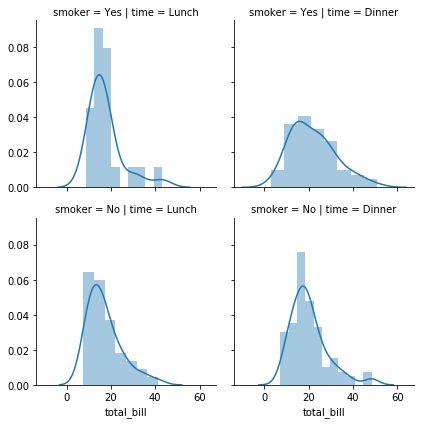

In [72]:
gg = sns.FacetGrid(data=tips,col='time',row='smoker')
gg.map(sns.distplot,'total_bill')

# columns = time
# row = smoker

## (E) Regression Plots

LM plot allows you to discover Liner Models with Seaborn

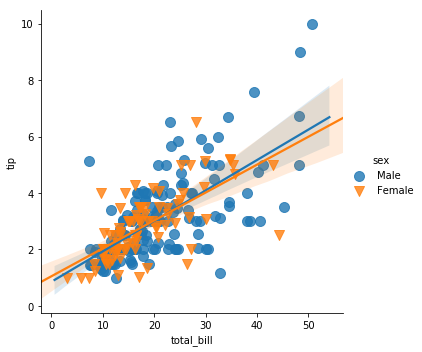

In [76]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})
# Are calling Matplotlib's scatter function and must pass in a dictionary to KWS.

# What to infer: Male and Female have almost the same linear fit

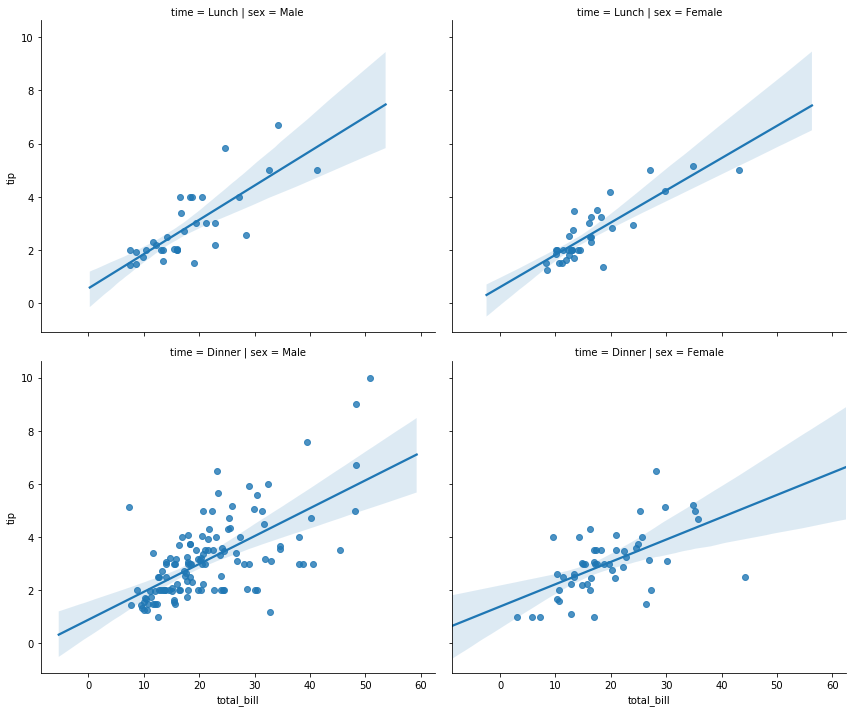

In [79]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',aspect = 1.2)
# aspect is width to height

## (E) Style and Colour